## Goal:
### Explore the plants dataset, clean data, perform analysis, and visualize results using NumPy, Pandas, Matplotlib, and Seaborn.

### 1. Why This Project?
 
#### 1.Learn data cleaning with Pandas.
 
#### 2.Use NumPy for calculations (mean, median, etc.).
 
#### 3.Visualize trends using Matplotlib and Seaborn.
 
#### 4.Understand the relationships between key astronomical features such as orbital period, mass, distance, and discovery year.

### 2. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

### 3. Load Dataset

In [3]:
df = sns.load_dataset('planets')
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


### 4. Explore Data

In [4]:
print("Shape:", df.shape)
print(df.info())
print(df.isnull().sum())
print(df.describe())

Shape: (1035, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB
None
method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64
            number  orbital_period        mass     distance         year
count  1035.000000      992.000000  513.000000   808.000000  1035.000000
mean      1.785507     2002.917596    2.638161   264.069282  2009.070531
std       1.240976    26014.728304    3.818617   733.116493     3.972567
min       1.

### 5. Data Cleaning

In [5]:
# Fill missing mass with median
df['mass'] = df['mass'].fillna(df['mass'].median())

# (If there were categorical columns needing mode fill, use below pattern)
# df['method'] = df['method'].fillna(df['method'].mode()[0])

# Drop rows with missing orbital_period
df = df.dropna(subset=['orbital_period'])


### Insights:
1. Filling age ensures numeric analysis is accurate.
 
2. Filling embarked ensures categorical analysis works.
 
3. Dropping orbital_period is optional since it has many missing values.

### 6. Analysis with NumPy & Pandas


In [6]:
# Average mass of plants
avg_mass = np.mean(df['mass'])
print("Average Mass:", avg_mass)
 
# Survival rate
orbital_period = df['orbital_period'].mean()
print("Overall Survival Rate:", orbital_period)
 
# orbital_period by distance
orbital_period_class = df.groupby('distance')['orbital_period'].mean()
print("Survival Rate by Class:\n", orbital_period_class)
 


Average Mass: 1.9726979637096775
Overall Survival Rate: 2002.9175960947582
Survival Rate by Class:
 distance
1.35          3.235700
3.22       2502.000000
4.54          4.693800
4.70         54.350620
4.94       3416.000000
              ...     
2250.00       3.246740
2500.00       1.689868
2700.00       6.873490
3200.00       3.352057
8500.00       2.998000
Name: orbital_period, Length: 530, dtype: float64


### 7. Visualization with Matplotlib

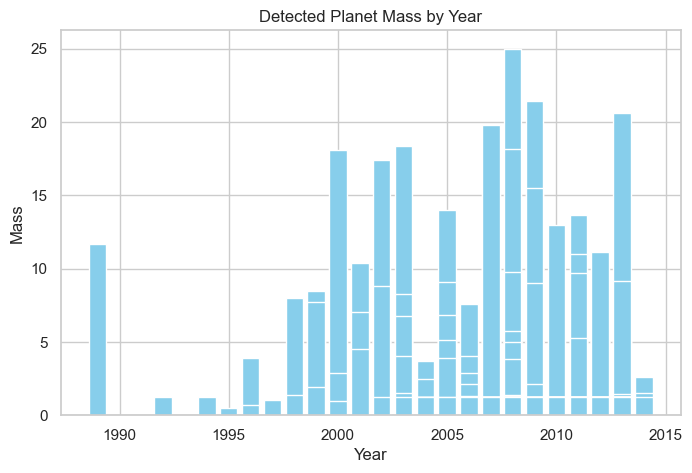

In [7]:
# Bar plot: Mass vs. Year
plt.figure(figsize=(8,5))
plt.bar(df['year'], df['mass'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Mass')
plt.title('Detected Planet Mass by Year')
plt.show()

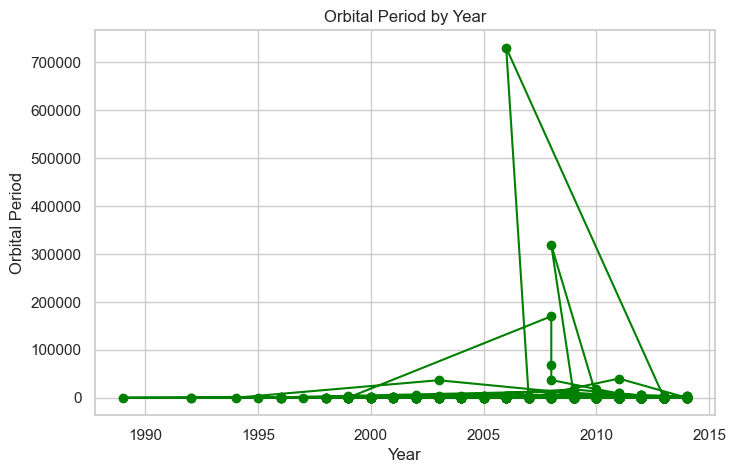

In [17]:
# Line plot: Orbital Period vs. Year
plt.figure(figsize=(8,5))
plt.plot(df['year'], df['orbital_period'], marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Orbital Period')
plt.title('Orbital Period by Year')
plt.show()

### Insights:

1. The distribution of detected planet masses across years shows variation, but there is no single clear upward or downward trend.

2. The orbital periods of detected planets vary widely by year, but there is no simple linear trend over time.

### 8. Visualization with Seaborn

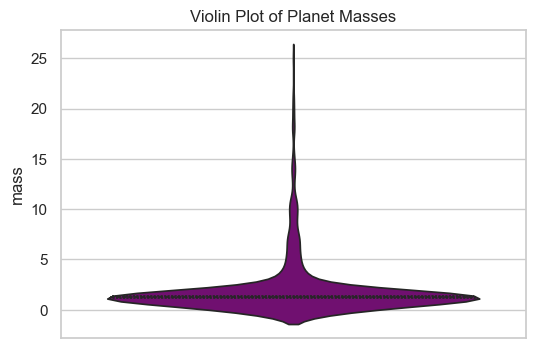

In [13]:
# Violin plot of mass (better for showing distribution shape)
plt.figure(figsize=(6,4))
sns.violinplot(y='mass', data=df, inner='quartile', color='purple')
plt.title('Violin Plot of Planet Masses')
plt.show()

### Insights:

1. Most detected planet masses cluster at lower values, with a few higher-mass outliers.

2. The distribution is right-skewed, indicating that while massive planets
have been detected, most discoveries tend to be lower-mass planets.

C:\Users\Koush\AppData\Local\Temp\ipykernel_27948\3256835667.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year', data=df, palette='Set2')


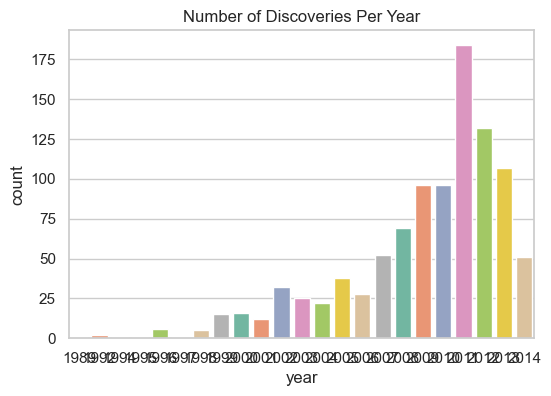

In [9]:
# Countplot of year (discoveries per year)
plt.figure(figsize=(6,4))
sns.countplot(x='year', data=df, palette='Set2')
plt.title('Number of Discoveries Per Year')
plt.show()

### Insights:

1. There is notable activity in 2008, with more planets detected than in other years, possibly due to targeted surveys or enhanced observational capabilities in that period.

2. Detection is distributed across a range of years, suggesting ongoing progress in detection methods.

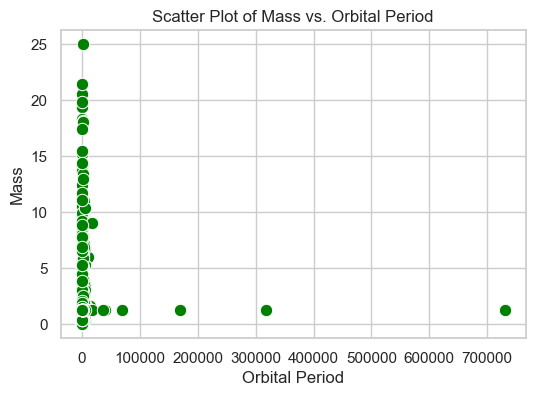

In [14]:
# Scatter plot: Mass vs. Orbital Period
plt.figure(figsize=(6,4))
sns.scatterplot(x='orbital_period', y='mass', data=df, s=80, color='green')
plt.title('Scatter Plot of Mass vs. Orbital Period')
plt.xlabel('Orbital Period')
plt.ylabel('Mass')
plt.show()

### Insights:

1. Heavier planets are found across a variety of orbital periods, but there is no simple direct relationship between mass and period.

2. Some of the most massive planets have intermediate orbital periods, not the extremes, indicating a diverse range of planetary system architectures.

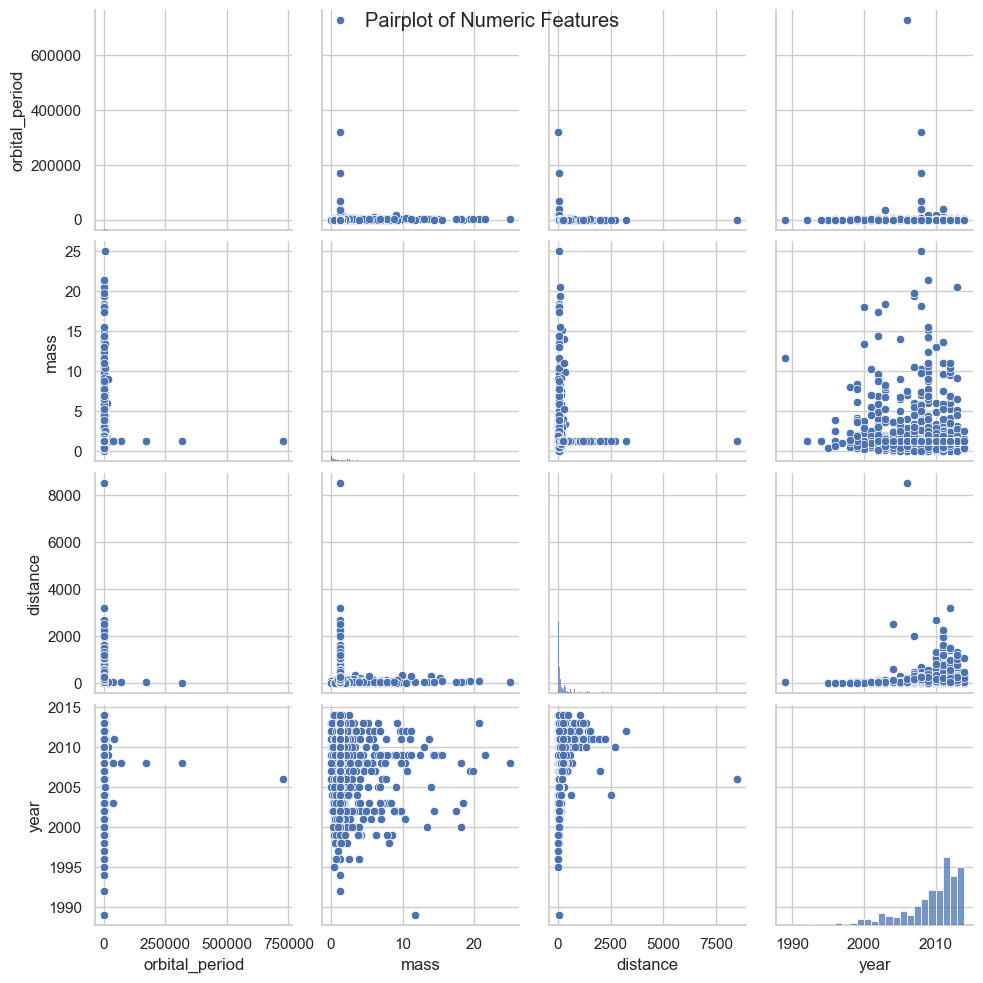

In [11]:
# Pairplot (relationships among numeric variables)
sns.pairplot(df[['orbital_period', 'mass', 'distance', 'year']])
plt.suptitle('Pairplot of Numeric Features')
plt.show()

### Insights:

1. No pair of numeric features is strongly linearly correlated, but scatter distributions hint at some clustering by ranges, especially for mass and orbital period.

2. The spread demonstrates the diversity of exoplanetary properties discovered by the Radial Velocity method.

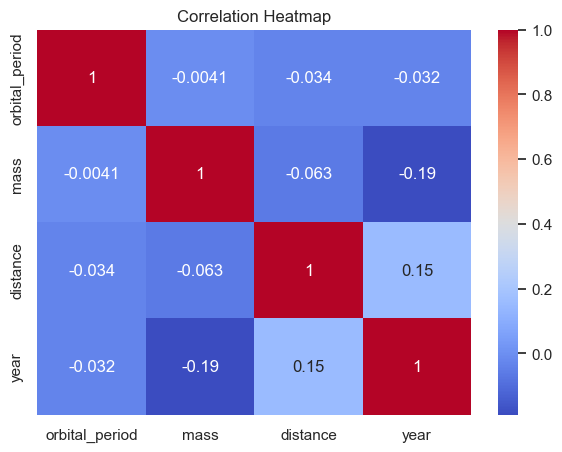

In [12]:
# Heatmap of correlation matrix
plt.figure(figsize=(7,5))
corr = df[['orbital_period', 'mass', 'distance', 'year']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Insights:

1. Correlations between the main numeric variables are weak, with no strong positive or negative relationships.

2. This suggests that features like mass, orbital period, distance, and year are largely independent in this sample, reflecting the variety and complexity of detected exoplanets.